# **Covid 19 Prediction Using X-RAY Images**


##STEP 1: Importing Required Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##STEP 2: Cloning Required Dataset

In [2]:
!git clone https://github.com/RishitToteja/Chext-X-ray-Images-Data-Set.git

fatal: destination path 'Chext-X-ray-Images-Data-Set' already exists and is not an empty directory.


In [3]:
import os

main_dir = "/content/Chext-X-ray-Images-Data-Set/DataSet/Data"

# Assigning Train And Test Directory
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")

# Assigning Directory For COVID AND NORMAL Images Directory
train_covid_dir = os.path.join(train_dir, "COVID19")
train_normal_dir = os.path.join(train_dir, "NORMAL")

test_covid_dir = os.path.join(test_dir, "COVID19")
test_normal_dir = os.path.join(test_dir, "NORMAL")

In [4]:
# Creating Seperate Files :
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)

test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

##STEP 3: Performing Data Visualizations

['/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(81).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(514).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID-19 (161).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID-19 (156).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(108).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(306).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(141).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(548).jpg']
['/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(207).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(891).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(175).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(653).j

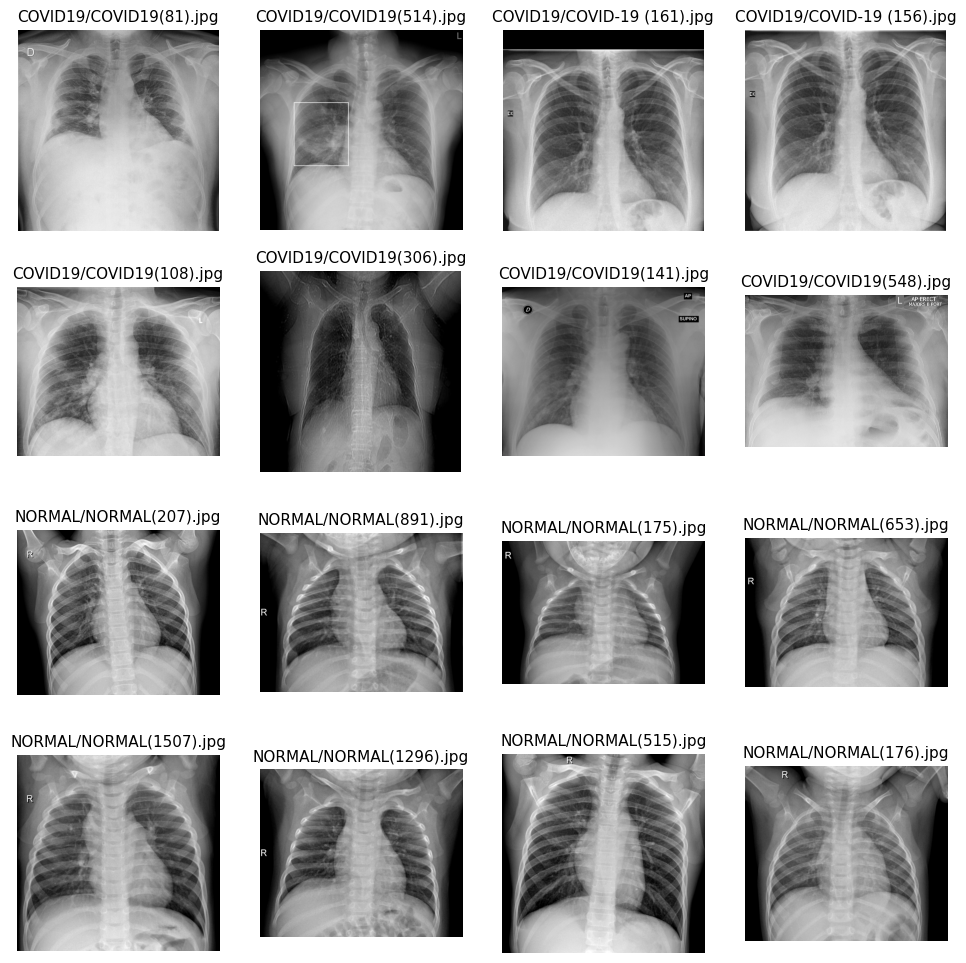

In [5]:
import matplotlib.image as mpimg

rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_img = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(covid_img)
print(normal_img)

merged_img = covid_img + normal_img

for i, img_path in enumerate(merged_img):
  title = img_path.split("/", 6)[6]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 11)
  plt.imshow(img, cmap= "gray")

plt.show()

##Step 4: Data Preprocessing And Augmentation

In [6]:
# Creating Training, Testing And Validation Batches

dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150, 150),
                                                      subset = "validation",
                                                      batch_size = 32,
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150, 150),
                                               batch_size = 32,
                                               class_mode = "binary")

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [7]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'COVID19': 0, 'NORMAL': 1}
Image shape is :  (150, 150, 3)


##STEP 5: Building Convolutional Neural Network Model

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))

# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

# 8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))

# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

### PRINTING MODEL SUMMARY
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [9]:
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.models import Sequential

# model = Sequential()

# # 1) CONVOLUTIONAL LAYER - 1
# model.add(Conv2D(32, (5, 5), padding="same", activation="relu", input_shape=(150, 150, 3)))

# # 2) POOLING LAYER - 1
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # 3) DROPOUT LAYER -2
# model.add(Dropout(0.5))

# # 4) CONVOLUTIONAL LAYER - 2
# model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))

# # 5) POOLING LAYER - 2
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # 6) DROPOUT LAYER - 2
# model.add(Dropout(0.5))

# # 7) FLATTENING LAYER TO 2D SHAPE
# model.add(Flatten())

# # 8) ADDING A DENSE LAYER
# model.add(Dense(256, activation='relu'))

# # 9 DROPOUT LAYER - 3
# model.add(Dropout(0.5))

# # 10) FINAL OUTPUT LAYER
# model.add(Dense(1, activation='sigmoid'))

# ### PRINTING MODEL SUMMARY
# model.summary()


##Step 6: Compiling And Training the Model

In [10]:
# Compiling the Model

model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
# TRAINING THE MODEL
history = model.fit(train_generator,
                    epochs = 10,
                    validation_data = validation_generator)

Epoch 1/10
46/46 [==============================] - 187s 4s/step - loss: 0.7851 - accuracy: 0.8054 - val_loss: 0.3996 - val_accuracy: 0.9006
Epoch 2/10
46/46 [==============================] - 188s 4s/step - loss: 0.2249 - accuracy: 0.9103 - val_loss: 0.3222 - val_accuracy: 0.9282
Epoch 3/10
46/46 [==============================] - 186s 4s/step - loss: 0.1875 - accuracy: 0.9262 - val_loss: 0.2728 - val_accuracy: 0.9365
Epoch 4/10
46/46 [==============================] - 181s 4s/step - loss: 0.1282 - accuracy: 0.9524 - val_loss: 0.1640 - val_accuracy: 0.9613
Epoch 5/10
46/46 [==============================] - 185s 4s/step - loss: 0.1283 - accuracy: 0.9648 - val_loss: 0.1382 - val_accuracy: 0.9586
Epoch 6/10
46/46 [==============================] - 184s 4s/step - loss: 0.1101 - accuracy: 0.9600 - val_loss: 0.1236 - val_accuracy: 0.9530
Epoch 7/10
46/46 [==============================] - 180s 4s/step - loss: 0.1228 - accuracy: 0.9600 - val_loss: 0.1377 - val_accuracy: 0.9586
Epoch 8/10
46

##Step 7: Performance Evaluation

In [12]:
# KEYS OF HISTORY OBJECT
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

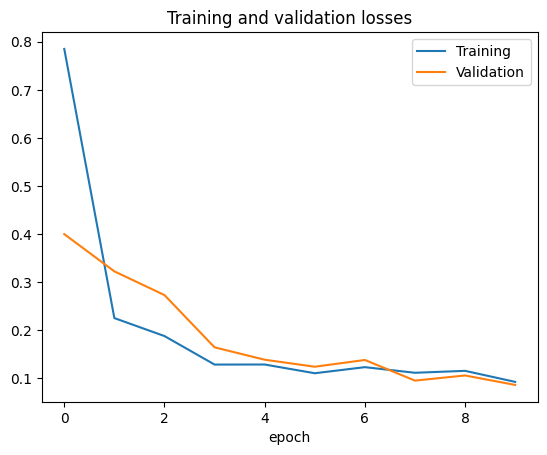

In [13]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

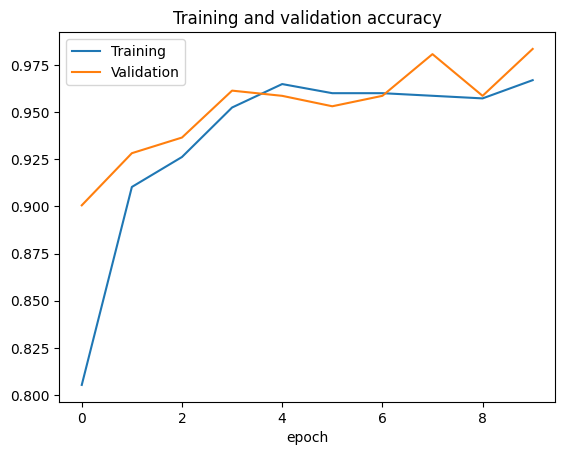

In [14]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [15]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

16/16 [==============================] - 23s 1s/step - loss: 0.1193 - accuracy: 0.9525
Test Set Loss :  0.11932843923568726
Test Set Accuracy :  0.952479362487793


### Step 8: Prediction on new data (Upload files)

In [16]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from google.colab import files
from PIL import Image
import numpy as np

uploaded = files.upload()

for filename in uploaded.keys():
    img_path = '/content/' + filename
    img = Image.open(img_path)
    img = img.resize((150, 150))  # Resize the image if needed
    images = np.array(img)
    images = np.expand_dims(images, axis=0)  # Add an additional dimension
    prediction = model.predict(images)

    if prediction == 0:
        print("The report is COVID-19 Positive")
    else:
        print("The report is COVID-19 Negative")


Saving 1-s2.0-S0140673620303706-fx1_lrg.jpg to 1-s2.0-S0140673620303706-fx1_lrg.jpg
1/1 [==============================] - 0s 59ms/step
The report is COVID-19 Positive
